In [838]:
# importing all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression, Lasso, LassoCV, ElasticNet, Ridge, RidgeCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [839]:
# reading the files into dataframes
df_train = pd.read_csv('./datasets/train.csv')
df_test = pd.read_csv('./datasets/test.csv')

In [840]:
# replacing indices in the training and testing dataframes with ID column
df_train.set_index('Id', inplace = True)
df_test.set_index('Id', inplace = True)

In [841]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2051 entries, 109 to 10
Data columns (total 80 columns):
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year Remod/Add     2051 non-null int64
Roof Style         2051 non-null object
Roof Matl          2

In [842]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Data columns (total 79 columns):
PID                878 non-null int64
MS SubClass        878 non-null int64
MS Zoning          878 non-null object
Lot Frontage       718 non-null float64
Lot Area           878 non-null int64
Street             878 non-null object
Alley              58 non-null object
Lot Shape          878 non-null object
Land Contour       878 non-null object
Utilities          878 non-null object
Lot Config         878 non-null object
Land Slope         878 non-null object
Neighborhood       878 non-null object
Condition 1        878 non-null object
Condition 2        878 non-null object
Bldg Type          878 non-null object
House Style        878 non-null object
Overall Qual       878 non-null int64
Overall Cond       878 non-null int64
Year Built         878 non-null int64
Year Remod/Add     878 non-null int64
Roof Style         878 non-null object
Roof Matl          878 non-null object
E

## Cleaning Data ##
### Dropping 2 largest outliers first ###

In [843]:
# While running my model I have found 2 extraordinary outliers that I will now remove to produce a better model
# We may later drop additional outliers upon further testing.
df_train.drop([2181, 1499], inplace = True)

### Replacing Null Values ###

In [844]:
# We need to convert the Ordinal string data into numbers to feed into our linear regression model
# Data dictionary provided in this project reveals the ranking system in English. We have interpretted these to numbers. 
# need to provide a link for this in the README

rating_dict = {'Ex': 5,'Gd': 4,'TA': 3,'Fa': 2,'Po': 1, np.nan : 0, 'NA': 0}
bsmt_expo_dict = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, np.nan: 0, 'NA': 0}
bsmt_fin_dict = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, np.nan: 0, 'NA': 0}
electrical_dict = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3, 'FuseP': 2, 'Mix': 1, np.nan: 0, 'NA': 0}
fence_dict = {'GdPrv': 4, 'MnPrv': 3, 'GdWo': 2, 'MnWw': 1, np.nan: 0, 'NA': 0}
functional_dict = {'Typ': 8, 'Min1': 7, 'Min2': 6, 'Mod': 5, 'Maj1': 4, 'Maj2': 3, 'Sev': 2, 'Sal':1, np.nan: 0, 'NA': 0}
garage_finish_dict = {'Fin': 3, 'RFn': 2, 'Unf': 1, np.nan: 0, 'NA': 0}
land_slope_dict = {'Gtl': 3, 'Mod': 2, 'Sev': 1, np.nan: 0, 'NA': 0}
lot_shape_dict = {'Reg': 4, 'IR1': 3, 'IR2': 2, 'IR3': 1, np.nan: 0, 'NA': 0}
paved_drive_dict = {'Y': 3, 'P': 2, 'N': 1, np.nan: 0, 'NA': 0}
pool_qc_dict = {'Ex': 4, 'Gd': 3, 'TA': 2, 'Fa': 1, np.nan: 0, 'NA': 0}
utilities_dict = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2, 'ELO': 1, np.nan: 0, 'NA': 0}

In [845]:
# Converting ordinal features from TRAINING data into numbers
df_train['Bsmt Cond'].replace(rating_dict, inplace = True)
df_train['Bsmt Qual'].replace(rating_dict, inplace = True)
df_train['Exter Cond'].replace(rating_dict, inplace = True)
df_train['Exter Qual'].replace(rating_dict, inplace = True)
df_train['Fireplace Qu'].replace(rating_dict, inplace = True)
df_train['Garage Cond'].replace(rating_dict, inplace = True) 
df_train['Garage Qual'].replace(rating_dict, inplace = True)
df_train['Heating QC'].replace(rating_dict, inplace = True)
df_train['Kitchen Qual'].replace(rating_dict, inplace = True)
df_train['BsmtFin Type 1'].replace(bsmt_fin_dict, inplace = True)
df_train['BsmtFin Type 2'].replace(bsmt_fin_dict, inplace = True)
df_train['Bsmt Exposure'].replace(bsmt_expo_dict, inplace = True)
df_train['Electrical'].replace(electrical_dict, inplace = True)
df_train['Fence'].replace(fence_dict, inplace = True)
df_train['Functional'].replace(functional_dict, inplace = True)
df_train['Garage Finish'].replace(garage_finish_dict, inplace = True)
df_train['Land Slope'].replace(land_slope_dict, inplace = True)
df_train['Lot Shape'].replace(lot_shape_dict, inplace = True)
df_train['Paved Drive'].replace(paved_drive_dict, inplace = True)
df_train['Pool QC'].replace(pool_qc_dict, inplace = True)
df_train['Utilities'].replace(utilities_dict, inplace = True)

In [846]:
# Converting ordinal features from TESTING data into numbers
df_test['Bsmt Cond'].replace(rating_dict, inplace = True)
df_test['Bsmt Qual'].replace(rating_dict, inplace = True)
df_test['Exter Cond'].replace(rating_dict, inplace = True)
df_test['Exter Qual'].replace(rating_dict, inplace = True)
df_test['Fireplace Qu'].replace(rating_dict, inplace = True)
df_test['Garage Cond'].replace(rating_dict, inplace = True) 
df_test['Garage Qual'].replace(rating_dict, inplace = True)
df_test['Heating QC'].replace(rating_dict, inplace = True)
df_test['Kitchen Qual'].replace(rating_dict, inplace = True)
df_test['BsmtFin Type 1'].replace(bsmt_fin_dict, inplace = True)
df_test['BsmtFin Type 2'].replace(bsmt_fin_dict, inplace = True)
df_test['Bsmt Exposure'].replace(bsmt_expo_dict, inplace = True)
df_test['Electrical'].replace(electrical_dict, inplace = True)
df_test['Fence'].replace(fence_dict, inplace = True)
df_test['Functional'].replace(functional_dict, inplace = True)
df_test['Garage Finish'].replace(garage_finish_dict, inplace = True)
df_test['Land Slope'].replace(land_slope_dict, inplace = True)
df_test['Lot Shape'].replace(lot_shape_dict, inplace = True)
df_test['Paved Drive'].replace(paved_drive_dict, inplace = True)
df_test['Pool QC'].replace(pool_qc_dict, inplace = True)
df_test['Utilities'].replace(utilities_dict, inplace = True)

In [847]:
# checking null values in TRAINING
df_train.isnull().sum().sort_values(ascending = False).head(16)

Misc Feature      1985
Alley             1909
Lot Frontage       330
Garage Yr Blt      114
Garage Type        113
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Full Bath       2
Bsmt Half Bath       2
Garage Area          1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
Garage Cars          1
BsmtFin SF 1         1
SalePrice            0
dtype: int64

In [848]:
# checking null values of TESTING data.
df_test.isnull().sum().sort_values(ascending = False).head(8)

Misc Feature     837
Alley            820
Lot Frontage     160
Garage Yr Blt     45
Garage Type       44
Mas Vnr Type       1
Mas Vnr Area       1
Exter Qual         0
dtype: int64

In [849]:
# creating dictionary to replace ALL null values
# nominal features will be replaced with 'None'
nominal_dict = {np.nan:'None'}

# Remaining features will be replaced with the mean values of those features.
lot_frontage_dict = {np.nan: df_train['Lot Frontage'].mean()}
mas_vnr_area_dict = {np.nan: df_train['Mas Vnr Area'].mean()}
garage_yr_blt_dict = {np.nan: df_train['Garage Yr Blt'].mean()}
bsmt_full_bath_dict = {np.nan: df_train['Bsmt Full Bath'].mean()}
bsmt_half_bath_dict = {np.nan: df_train['Bsmt Half Bath'].mean()}
bsmtFin_SF_2_dict = {np.nan: df_train['BsmtFin SF 2'].mean()}
garage_cars_dict = {np.nan: df_train['Garage Cars'].mean()}
garage_area_dict = {np.nan: df_train['Garage Area'].mean()}
bmst_unf_sf_dict = {np.nan: df_train['Bsmt Unf SF'].mean()}
total_bsmt_sf_dict = {np.nan: df_train['Total Bsmt SF'].mean()}
bmst_fin_sf_1_dict = {np.nan: df_train['BsmtFin SF 1'].mean()}

In [850]:
# Replacing nulls in TRAINING data
# Nominal features
df_train['Garage Type'].replace(nominal_dict, inplace = True)
df_train['Mas Vnr Type'].replace(nominal_dict, inplace = True)
df_train['Misc Feature'].replace(nominal_dict, inplace = True)
df_train['Alley'].replace(nominal_dict, inplace = True)

# remaining features
df_train['Lot Frontage'].replace(lot_frontage_dict, inplace = True)
df_train['Mas Vnr Area'].replace(mas_vnr_area_dict, inplace = True)
df_train['Garage Yr Blt'].replace(garage_yr_blt_dict, inplace = True)
df_train['Bsmt Full Bath'].replace(bsmt_full_bath_dict, inplace = True)
df_train['Bsmt Half Bath'].replace(bsmt_half_bath_dict, inplace = True)
df_train['BsmtFin SF 2'].replace(bsmtFin_SF_2_dict, inplace = True)
df_train['Garage Cars'].replace(garage_cars_dict, inplace = True)
df_train['Garage Area'].replace(garage_area_dict, inplace = True)
df_train['Bsmt Unf SF'].replace(bmst_unf_sf_dict, inplace = True)
df_train['Total Bsmt SF'].replace(total_bsmt_sf_dict, inplace = True)
df_train['BsmtFin SF 1'].replace(bmst_fin_sf_1_dict, inplace = True)

In [851]:
# Replacing nulls in TESTING data
# nominal features
df_test['Garage Type'].replace(nominal_dict, inplace = True)
df_test['Mas Vnr Type'].replace(nominal_dict, inplace = True)
df_test['Misc Feature'].replace(nominal_dict, inplace = True)
df_test['Alley'].replace(nominal_dict, inplace = True)

# remaining features
df_test['Lot Frontage'].replace(lot_frontage_dict, inplace = True)
df_test['Mas Vnr Area'].replace(mas_vnr_area_dict, inplace = True)
df_test['Garage Yr Blt'].replace(garage_yr_blt_dict, inplace = True)
df_test['Bsmt Full Bath'].replace(bsmt_full_bath_dict, inplace = True)
df_test['Bsmt Half Bath'].replace(bsmt_half_bath_dict, inplace = True)
df_test['BsmtFin SF 2'].replace(bsmtFin_SF_2_dict, inplace = True)
df_test['Garage Cars'].replace(garage_cars_dict, inplace = True)
df_test['Garage Area'].replace(garage_area_dict, inplace = True)
df_test['Bsmt Unf SF'].replace(bmst_unf_sf_dict, inplace = True)
df_test['Total Bsmt SF'].replace(total_bsmt_sf_dict, inplace = True)
df_test['BsmtFin SF 1'].replace(bmst_fin_sf_1_dict, inplace = True)

In [852]:
# checking remaining null values in the TRAINING data
df_train.isnull().sum().sort_values(ascending = False).head(2)

SalePrice    0
Sale Type    0
dtype: int64

In [853]:
# checking remaining null values in the TESTING data
df_test.isnull().sum().sort_values(ascending = False).head(2)

Sale Type     0
Exter Cond    0
dtype: int64

### Decided AGAINST droping Null rows ###

In [854]:
# drop remaining 2 rows of data
# df_train.dropna(inplace=True)

### Interaction ###
#### original test


In [855]:
# interactions on Training data
df_train['Half * Full Bath'] = df_train['Full Bath'] * df_train['Half Bath']
df_train['1st * 2nd Flr SF'] = df_train['1st Flr SF'] * df_train['2nd Flr SF']
df_train['Fireplaces * Qu'] = df_train['Fireplaces'] * df_train['Fireplace Qu']

# Interactions Testing
df_test['Half * Full Bath'] = df_test['Full Bath'] * df_test['Half Bath']
df_test['1st * 2nd Flr SF'] = df_test['1st Flr SF'] * df_test['2nd Flr SF']
df_test['Fireplaces * Qu'] = df_test['Fireplaces'] * df_test['Fireplace Qu']      

In [856]:
df_train.shape

(2049, 83)

In [857]:
df_test.shape

(878, 82)

### Features ###

In [858]:
# features = ['Lot Frontage', 'Lot Area', 'Lot Shape', 'Utilities', 'Land Slope',
#        'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add',
#        'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Bsmt Qual', 'Bsmt Cond',
#        'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
#        'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating QC',
#        'Electrical', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF',
#        'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath',
#        'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual',
#        'TotRms AbvGrd', 'Functional', 'Fireplaces', 'Fireplace Qu',
#        'Garage Yr Blt', 'Garage Finish', 'Garage Cars', 'Garage Area',
#        'Garage Qual', 'Garage Cond', 'Paved Drive', 'Wood Deck SF',
#        'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
#        'Pool Area', 'Pool QC', 'Fence', 'Misc Val', 'Mo Sold', 'Yr Sold']

### Excluded  features

In [859]:
# Excluded features due to P-value > 0.05
excluded_features = ['PID']
# removing nominal feature
#                      'Mas Vnr Type', 'MS SubClass', 'MS Zoning', 'Street', 'Misc Feature', 'Land Contour', 
#                      'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
#                      'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Alley', 'Foundation',
#                      'Garage Type', 'Heating', 'Central Air', 'Mas Vnr Type', 'Sale Type']
                    
# # Low P values AND low correlation (between -0.25 and 0.25)
#                     'Utilities', 'Land Slope', 'Exter Cond', 'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF',
#                      'Low Qual Fin SF', 'Bsmt Half Bath', 'Enclosed Porch', '3Ssn Porch','Fence', 'Misc Val',
#                      'Mo Sold', 
# # remaining low correlation features                   
#                      'Overall Cond', 'Bsmt Cond', 'Electrical', 'Bedroom AbvGr', 'Kitchen AbvGr', 'Functional', 
#                      'Screen Porch', 'Pool Area', 'Pool QC', 'Yr Sold'

# Low P values AND Medium Correlation (between 0.25 to 0.5, the negative versions) # haven't tried this yet
#                      'Lot Shape', 'Heating QC', 'Bsmt Full Bath', 'Garage Qual', 'Paved Drive', 'Wood Deck SF', 
#                      'Open Porch SF'

In [860]:
nominal_features = ['Mas Vnr Type', 'MS SubClass', 'MS Zoning', 'Street', 'Misc Feature', 'Land Contour', 
                     'Lot Config', 'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type', 'House Style',
                     'Roof Style', 'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Alley', 'Foundation',
                     'Garage Type', 'Heating', 'Central Air', 'Sale Type']

In [861]:
# dropping unused features for both dataframes
df_train.drop(columns = excluded_features, inplace = True)
df_test.drop(columns = excluded_features, inplace = True)

In [862]:
df_train.shape

(2049, 82)

In [863]:
df_test.shape

(878, 81)

In [864]:
# getting Dummies for categorizations - Nominal features
df_train = pd.get_dummies(data = df_train, columns = nominal_features)
df_test = pd.get_dummies(data = df_test, columns = nominal_features)

In [865]:
df_test.shape

(878, 224)

In [866]:
df_train.shape

(2049, 234)

In [867]:
set(df_test.columns) - set(df_train.columns)

{'Exterior 1st_PreCast',
 'Exterior 2nd_Other',
 'Exterior 2nd_PreCast',
 'Heating_Floor',
 'Mas Vnr Type_CBlock',
 'Roof Matl_Metal',
 'Roof Matl_Roll',
 'Sale Type_VWD'}

In [868]:
set(df_train.columns) - set(df_test.columns)

{'Condition 2_Artery',
 'Condition 2_PosN',
 'Condition 2_RRAe',
 'Condition 2_RRAn',
 'Condition 2_RRNn',
 'Exterior 1st_CBlock',
 'Exterior 1st_ImStucc',
 'Exterior 1st_Stone',
 'Exterior 2nd_Stone',
 'Heating_OthW',
 'Heating_Wall',
 'MS SubClass_150',
 'MS Zoning_A (agr)',
 'Misc Feature_TenC',
 'Neighborhood_GrnHill',
 'Neighborhood_Landmrk',
 'Roof Matl_Membran',
 'SalePrice'}

### Same columns on both dataframes ###

In [869]:
# provides the columns that exist in Train that do NOT exist in Test (and vice versa0)
add_columns_to_train = set(df_test.columns) - set(df_train.columns)
add_columns_to_test = set(df_train.columns) - set(df_test.columns)

# Add columns that were exclusive to test.csv to df_train (and vice versa)
for col in add_columns_to_train:
    df_train[col] = 0
for col in add_columns_to_test:
    df_test[col] = 0

# Reorder df_train to match df_test columns
df_train = df_train[df_test.columns]

# Removing SalePrice from Test
df_test = df_test.drop('SalePrice', axis = 1)

In [870]:
df_train.shape

(2049, 242)

In [871]:
df_test.shape

(878, 241)

In [872]:
# drops first column of the group of dummy columns 
for nom in nominal_features:
    dummy_list = [col for col in df_train.columns if nom in col]
    df_train.drop(columns = dummy_list[0], inplace = True)
    df_test.drop(columns = dummy_list[0], inplace = True)

In [873]:
set(df_train.columns) - set(df_test.columns)

{'SalePrice'}

In [874]:
# converting the object data types into float64 for both test and training data so we can run a regression
df_train = df_train.astype('float64')
df_test = df_test.astype('float64')

In [875]:
df_train.shape

(2049, 220)

In [876]:
df_test.shape

(878, 219)

## Testing the model

In [877]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 878 entries, 2658 to 1939
Columns: 219 entries, Lot Frontage to Misc Feature_TenC
dtypes: float64(219)
memory usage: 1.5 MB


In [878]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049 entries, 109 to 10
Columns: 220 entries, Lot Frontage to Misc Feature_TenC
dtypes: float64(220)
memory usage: 3.5 MB


In [879]:
# Dropping remaining outliers FOR TESTING.
df_train.drop([434, 1183, 1783, 2333], inplace = True)
 
# other ones [1560, 1697, 1700, 45, 2257]

#2333, 1641, 2116 keep these, or we'll worsen the score

In [880]:
# setting X and y variables
X = df_train.drop(columns = 'SalePrice')
y = df_train['SalePrice']

### Train Test Split

In [881]:
# running Train Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [882]:
# Instantiate Standard Scaler.
sc = StandardScaler()

# Fit AND transform Standard Scaler to data in one step.
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [883]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

### Linear Regression

In [884]:
# # Reminder of Linear
# lr = LinearRegression()
# lr.fit(Z_train, y_train) # or y_train_log

In [885]:
# # predicting values for linear regression
# y_hat_lr_train = lr.predict(Z_train) # or y_hat_lr_train_log
# y_hat_lr_test = lr.predict(Z_test) # or y_hat_lr_test_log

In [886]:
# # need to test
# preds_lr_train = np.exp(y_hat_lr_train_log)
# preds_lr_test = np.exp(y_hat_lr_test_log)

In [ ]:
# # this is the 5 fold cross val score
# cross_val_score(lr, X_train, y_train, cv=5).mean()

### Ridge Regression ###

In [887]:
# Set up a list of ridge alphas to check.
# Generates 100 values equally between 0 and 5,
# then converts them to alphas between 10^0 and 10^5.
ridge_alphas = np.logspace(0, 3, 100)

# Cross-validate over our list of ridge alphas.
ridge_cv = RidgeCV(
    alphas = ridge_alphas,
    scoring = "r2",
    cv = 5) #How many folds

# Fit model using best ridge alpha!
ridge_cv.fit(Z_train, y_train_log) # or y_train log 

RidgeCV(alphas=array([   1.        ,    1.07226722,    1.149757  ,    1.23284674,
          1.32194115,    1.41747416,    1.51991108,    1.62975083,
          1.7475284 ,    1.87381742,    2.009233  ,    2.15443469,
          2.3101297 ,    2.47707636,    2.65608778,    2.84803587,
          3.05385551,    3.27454916,    3.51119173,    3.76493581,
          4.03701726,    4.32876128,    4.64158883,    4.97702356,
          5.33669923,    5.72236766,    6.13590727,    6.57933225,
          7.05480231,    7.56463328,    8.11130831,    8...
        200.92330026,  215.443469  ,  231.01297001,  247.7076356 ,
        265.60877829,  284.80358684,  305.38555088,  327.45491629,
        351.11917342,  376.49358068,  403.70172586,  432.87612811,
        464.15888336,  497.70235643,  533.66992312,  572.23676594,
        613.59072734,  657.93322466,  705.48023107,  756.46332755,
        811.13083079,  869.74900262,  932.60334688, 1000.        ]),
        cv=5, fit_intercept=True, gcv_mode=None, nor

In [888]:
# Optimal Alpha
ridge_cv.alpha_

215.44346900318845

In [889]:
print(ridge_cv.score(Z_train, y_train))
print(ridge_cv.score(Z_test, y_test))

-5.5854227942332875
-4.715153445152162


In [890]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(Z_train, y_train_log) # or y_train_log

Ridge(alpha=215.44346900318845, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [891]:
# predicting values with Ridge
y_hat_ridge_train = ridge.predict(Z_train) # these are log versions
y_hat_ridge_test = ridge.predict(Z_test)

In [908]:
# need to test
preds_ridge_train = np.exp(y_hat_ridge_train)
preds_ridge_test = np.exp(y_hat_ridge_test)

In [893]:
# # need to test
# preds_lr_train = np.exp(y_hat_lr_train_log)
# preds_lr_test = np.exp(y_hat_lr_test_log)

### LASSO

In [894]:
# # Set up a list of Lasso alphas to check.
# lasso_alphas = np.logspace(-3, 0, 100)

# # Cross-validate over our list of Lasso alphas.
# lasso = LassoCV(
#     alphas = lasso_alphas,
#     cv = 5,
#     max_iter = 5000)

# # Fit model using best ridge alpha!
# lasso.fit(Z_train, y_train)

In [895]:
# lasso.alpha_

In [896]:
# print(lasso.score(Z_train, y_train))
# print(lasso.score(Z_test, y_test))

In [897]:
# cross_val_score(lr, X, y, cv = 5).mean()

### Heatmap of Correlations

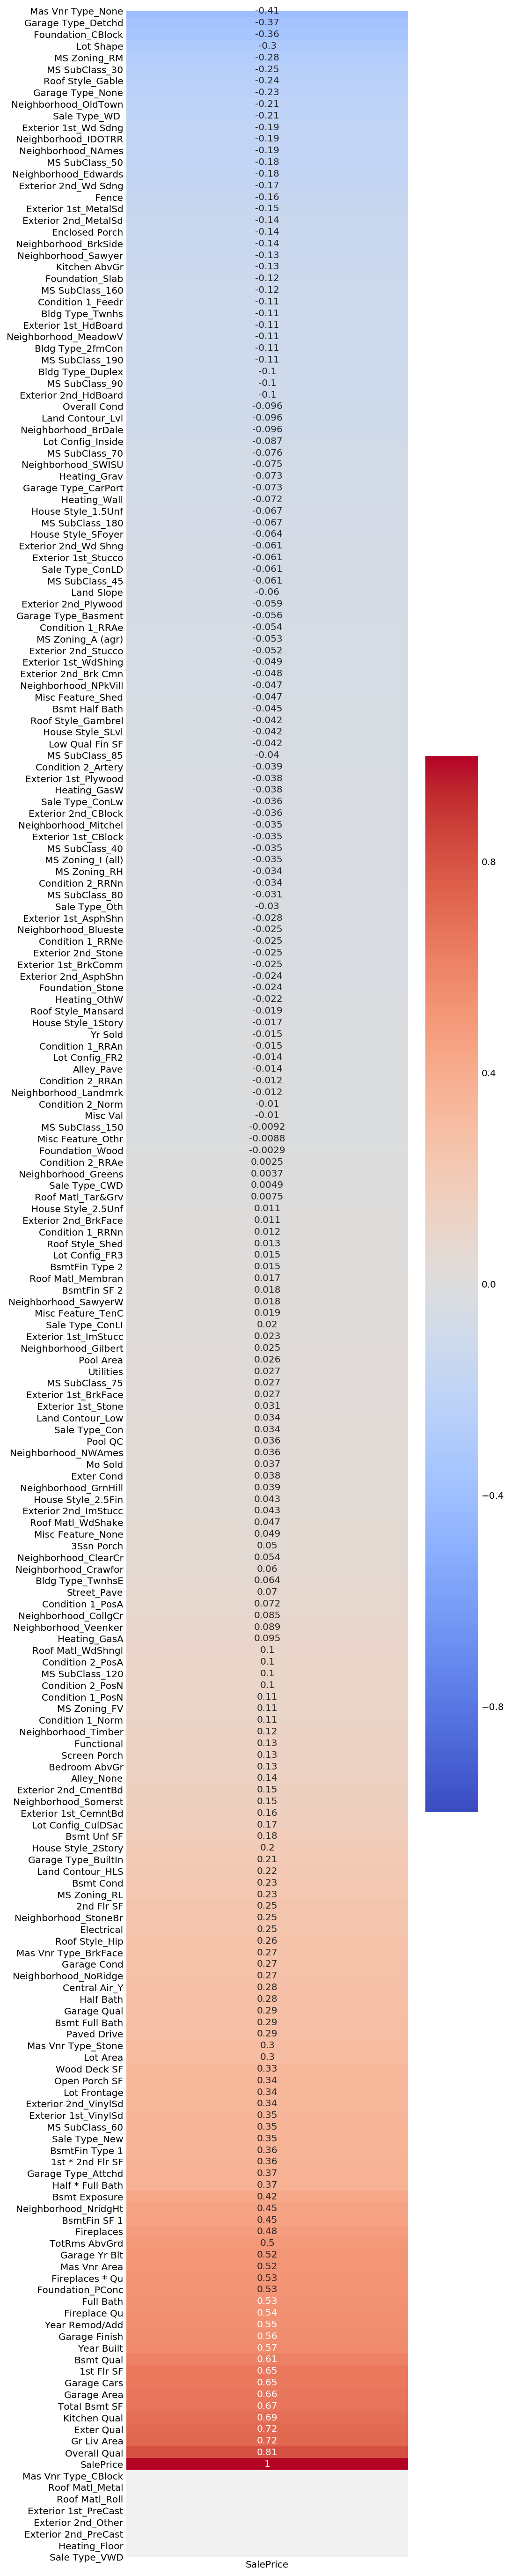

In [898]:
plt.figure(figsize = (6, 50)) # this figsizes are in inches wide and tall
# need to specify which column you want to sort by, even though there is only 1 column
sns.heatmap(df_train.corr()[['SalePrice']].sort_values('SalePrice'),
            cmap = 'coolwarm',
            vmin = -1,
            vmax = 1,
            annot=True);

### Finding P values ###

In [899]:
#OLS on a test
X_ols = sm.add_constant(X)
est = sm.OLS(y, X.astype(float)).fit()
est.summary()

C:\Users\16463\AppData\Local\Continuum\anaconda3\envs\dsi\lib\site-packages\numpy\core\fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     136.4
Date:                Wed, 15 Jan 2020   Prob (F-statistic):               0.00
Time:                        17:53:07   Log-Likelihood:                -23090.
No. Observations:                2045   AIC:                         4.660e+04
Df Residuals:                    1837   BIC:                         4.777e+04
Df Model:                         207                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Lot Frontage            79.8938     34.854      2.292      0.022      11.537     148.251
Lot Area                 0.6119      0.103      5.923      0.000       0.409       0.815
Lot Shape             1036.2222   1021.601      1.014      0.311    -967.398    3039.843
Utilities             2.822e+04   1.22e+04      2.319      0.020    4354.663    5.21e+04
Land Slope             176.8902   2608.827      0.068      0.946   -4939.688    5293.468
Overall Qual          8141.5188    739.778     11.005      0.000    6690.625    9592.413
Overall Cond          4655.1577    634.983      7.331      0.000    3409.794    5900.522
Year Built             361.1898     59.858      6.034      0.000     243.793     478.586
Year Remod/Add          74.2812     41.135      1.806      0.071      -6.395     154.958
Mas Vnr Area            41.1173      4.486      9.166      0.000      32.320      49.915
Exter Qual            8266.4588   1562.339      5.291      0.000    5202.312    1.13e+04
Exter Cond            -783.6489   1500.841     -0.522      0.602   -3727.183    2159.885
Bsmt Qual             2931.5015   1209.709      2.423      0.015     558.952    5304.051
Bsmt Cond            -3875.8133   1451.060     -2.671      0.008   -6721.713   -1029.914
Bsmt Exposure         3728.1537    624.288      5.972      0.000    2503.766    4952.542
BsmtFin Type 1        -304.0305    378.425     -0.803      0.422   -1046.219     438.158
BsmtFin SF 1            18.5279      1.888      9.811      0.000      14.824      22.232
BsmtFin Type 2         223.8460    845.889      0.265      0.791   -1435.158    1882.850
BsmtFin SF 2             4.3672      3.687      1.185      0.236      -2.864      11.598
Bsmt Unf SF             -4.3114      1.672     -2.579      0.010      -7.590      -1.033
Total Bsmt SF           18.5837      2.476      7.505      0.000      13.727      23.440
Electrical           -1444.0240   1411.793     -1.023      0.307   -4212.913    1324.865
1st Flr SF              21.4981      3.954      5.437      0.000      13.743      29.253
2nd Flr SF              -2.7727      5.320     -0.521      0.602     -13.206       7.661
Low Qual Fin SF          6.0914      8.084      0.754      0.451      -9.763      21.946
Gr Liv Area             24.8164      4.116      6.029      0.000      16.744      32.889
Bsmt Full Bath        2383.8740   1404.610      1.697      0.090    -370.926    5138.674
Bsmt Half Bath         529.1886   2093.974      0.253      0.801   -3577.631    4636.009
Full Bath             -698.0424   1727.628     -0.404      0.686   -4086.363    2690.279
Half Bath            -5565.0200   3087.991     -1.802      0.072   -1.16e+04     491.321
Bedroom AbvGr        -4250.8747    970.467     -4.380      0.000   -6154.209   -2347.540
Kitchen AbvGr        -4121.3360   4810.597     -0.857    

### Plot Predictions ###

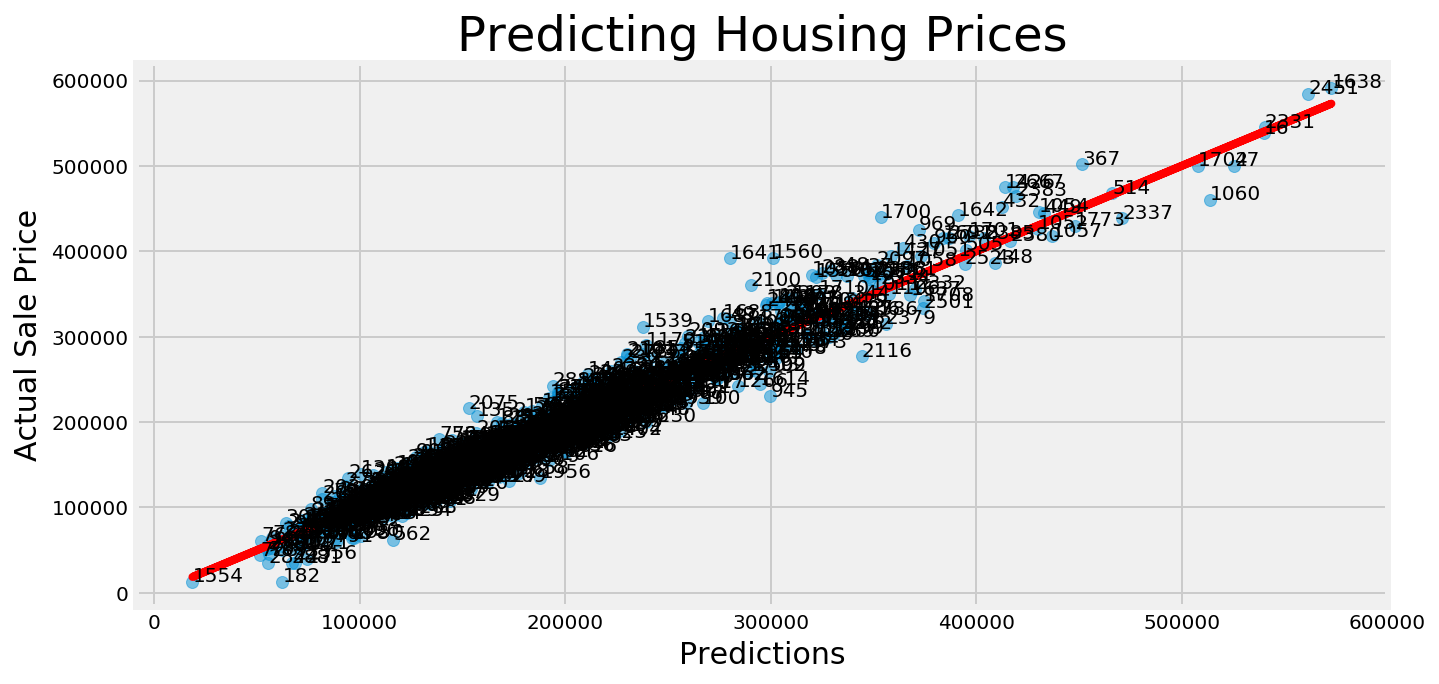

In [900]:
# plotting training data for Y hat vs actual Y to find outliers
plt.figure(figsize=(10,5))

# Generate a scatterplot of carat versus price.
plt.scatter(preds_ridge_train, # y_hat_lr_train vs preds_train
            y_train,
            alpha = 0.5)

plt.xlabel('Predictions', fontsize = 15)
plt.ylabel('Actual Sale Price', fontsize = 15)
plt.title("Predicting Housing Prices", fontsize = 24)

# attempting to annot each value
training = 0
for i, txt in y_train.iteritems():
    plt.annotate(i, (preds_ridge_train[training], y_train[i])) # y_hat_lr_train vs preds_train
    training += 1

# plot the regression line
plt.plot(preds_ridge_train, # y_hat_lr_train vs preds_train
         preds_ridge_train, # y_hat_lr_train vs preds_train
         color = 'red');


In [903]:
# Mean Squared Errors for Y Training
np.sqrt(mean_squared_error(y_train, preds_ridge_train)) # keep updating y_test values here for the models

16516.150052421766

In [909]:
# test data linear regression RMSE
np.sqrt(mean_squared_error(y_test, preds_ridge_test)) # keep updating y_test values here for the models

21028.145983614635

### Kaggle

In [906]:
X_kaggle = df_test

In [907]:
X_kaggle_sc = sc.transform(X_kaggle)

In [1944]:
# # Linear Regression
# preds_kaggle_log = lr.predict(X_kaggle_sc)
# X_kaggle['SalePrice'] = np.exp(preds_kaggle_log)

In [ ]:
# Ridge Regression
preds_kaggle_log = ridge.predict(X_kaggle_sc)
X_kaggle['SalePrice'] = np.exp(preds_kaggle_log)

In [ ]:
# LASSO Regression
preds_kaggle_log = lr.predict(X_kaggle_sc)
X_kaggle['SalePrice'] = np.exp(preds_kaggle_log)

In [1945]:
X_kaggle.head()

,Lot Frontage,Lot Area,Lot Shape,Overall Qual,Year Built,Year Remod/Add,Mas Vnr Area,Exter Qual,Bsmt Qual,Bsmt Exposure,...,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Half * Full Bath,1st * 2nd Flr SF,Fireplaces * Qu,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
2658,69.0000,9142.0,4.0,6.0,1910.0,1950.0,0.0,3.0,2.0,1.0,...,440.0,1.0,1.0,3.0,0.0,60.0,0.0,926160.0,0.0,128570.797700
2718,69.0552,9662.0,3.0,5.0,1977.0,1977.0,0.0,3.0,4.0,1.0,...,580.0,3.0,3.0,3.0,170.0,0.0,0.0,0.0,0.0,171993.671151
2414,58.0000,17104.0,3.0,7.0,2006.0,2006.0,0.0,4.0,4.0,3.0,...,426.0,3.0,3.0,3.0,100.0,24.0,2.0,552448.0,4.0,215131.201779
1989,60.0000,8520.0,4.0,5.0,1923.0,2006.0,0.0,4.0,3.0,1.0,...,480.0,2.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,103186.439751
625,69.0552,9500.0,3.0,6.0,1963.0,1963.0,247.0,3.0,4.0,1.0,...,514.0,3.0,3.0,3.0,0.0,76.0,1.0,0.0,8.0,171031.970959


In [1946]:
output = X_kaggle[['SalePrice']]

In [1947]:
output

,SalePrice
Id,
2658,128570.797700
2718,171993.671151
2414,215131.201779
1989,103186.439751
625,171031.970959
...,...
1662,182329.826469
1234,216997.493554
1373,130128.098317


In [1948]:
# this is how we submit to kaggle
output.to_csv('./datasets/LowCorrelations_3InteractionsAdded_6OutliersRemoved_.csv')